based on https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
data exploration form https://pdfs.semanticscholar.org/de8b/25cc7203a5be8d59526173f5e67a752bc4c7.pdf

In [1]:
from AR_functions import *

/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3

Num GPUs Available:  1



/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.virtualenvs/python3_ml/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.virtualenvs/p

In [2]:
tensorflow.set_random_seed(123)
np.random.seed(123)

read and save the training and testing sets

In [3]:
(x_train, y_train), (x_test, y_test) = load_dataset()

preprocess the images by dividing over 225. Also transform the labels to categorical

In [4]:
x_train, x_test = preprocessImages(x_train, x_test)

define the model

In [5]:
def define_model():
    # define architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_uniform',
                     input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                    kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile the model 
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
epochs=100
batch_size=64

model = define_model()
history = model.fit(x_train, y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 137us/sample - loss: 1.7211 - acc: 0.3845 - val_loss: 1.5062 - val_acc: 0.4549
Epoch 2/100
50000/50000 [==============================] - 6s 119us/sample - loss: 1.3846 - acc: 0.5114 - val_loss: 1.3227 - val_acc: 0.5322
Epoch 3/100
50000/50000 [==============================] - 5s 108us/sample - loss: 1.2444 - acc: 0.5634 - val_loss: 1.2286 - val_acc: 0.5613
Epoch 4/100
50000/50000 [==============================] - 6s 113us/sample - loss: 1.1447 - acc: 0.5995 - val_loss: 1.1525 - val_acc: 0.5954
Epoch 5/100
50000/50000 [==============================] - 6s 117us/sample - loss: 1.0644 - acc: 0.6301 - val_loss: 1.0947 - val_acc: 0.6139
Epoch 6/100
50000/50000 [==============================] - 6s 112us/sample - loss: 1.0000 - acc: 0.6491 - val_loss: 1.0703 - va

Epoch 56/100
50000/50000 [==============================] - 5s 94us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 2.3477 - val_acc: 0.6708
Epoch 57/100
50000/50000 [==============================] - 5s 109us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 2.3558 - val_acc: 0.6684
Epoch 58/100
50000/50000 [==============================] - 5s 109us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 2.3694 - val_acc: 0.6703
Epoch 59/100
50000/50000 [==============================] - 6s 119us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3831 - val_acc: 0.6699
Epoch 60/100
50000/50000 [==============================] - 6s 119us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 2.3905 - val_acc: 0.6705
Epoch 61/100
50000/50000 [==============================] - 5s 107us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 2.4059 - val_acc: 0.6704
Epoch 62/100
50000/50000 [==============================] - 6s 112us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 2.4175 - val_acc: 0.6706
Epoch 6

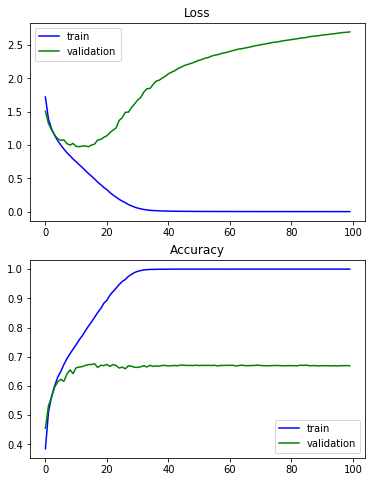

In [7]:
loss_acc_plots(history)

In [8]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 66.860
